In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('IRIS.csv')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Checking for typos in classes' names in the species col

In [4]:

species_list = df['species'].unique()
print(species_list)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Data points that evaluate to Iris-virginica are ignored (removed)

In [5]:
final_df = df.copy()
final_df = final_df[df['species'] != 'Iris-virginica']
species_list = final_df['species'].unique()
print(species_list)

['Iris-setosa' 'Iris-versicolor']


Only ones evaluating to either setosa or versicolor are considered in this model
(Setosa->1 and Versicolor->0)

In [6]:
final_df['species'] = final_df['species'].map({'Iris-setosa': 1, 'Iris-versicolor': 0})
final_df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,0
96,5.7,2.9,4.2,1.3,0
97,6.2,2.9,4.3,1.3,0
98,5.1,2.5,3.0,1.1,0


I'll rename the 'species' column to 'is_setosa_vs_versicolor' (to better reflect its content now)(bcz why not)

In [7]:
final_df.rename(columns={'species': 'is_setosa_vs_versicolor'}, inplace=True)
final_df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,is_setosa_vs_versicolor
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,0
96,5.7,2.9,4.2,1.3,0
97,6.2,2.9,4.3,1.3,0
98,5.1,2.5,3.0,1.1,0


In [8]:
final_df['is_setosa_vs_versicolor'].value_counts()

is_setosa_vs_versicolor
1    50
0    50
Name: count, dtype: int64

The correlation matrix (between each two columns)

(just check the entries below the diagonal line, since whatever above it is a reflected copy of below)


In [9]:
final_df.corr()

,sepal_length,sepal_width,petal_length,petal_width,is_setosa_vs_versicolor
sepal_length,1.000000,-0.197646,0.812389,0.789613,-0.728290
sepal_width,-0.197646,1.000000,-0.595761,-0.560120,0.684019
petal_length,0.812389,-0.595761,1.000000,0.978856,-0.969955
petal_width,0.789613,-0.560120,0.978856,1.000000,-0.960158
is_setosa_vs_versicolor,-0.728290,0.684019,-0.969955,-0.960158,1.000000


petal_width and petal_length are highly correlated (0.978856)

In [10]:
petal_length_col = final_df['petal_length']
petal_width_col = final_df['petal_width']

Let's investigate their correlation further using a 2D plot

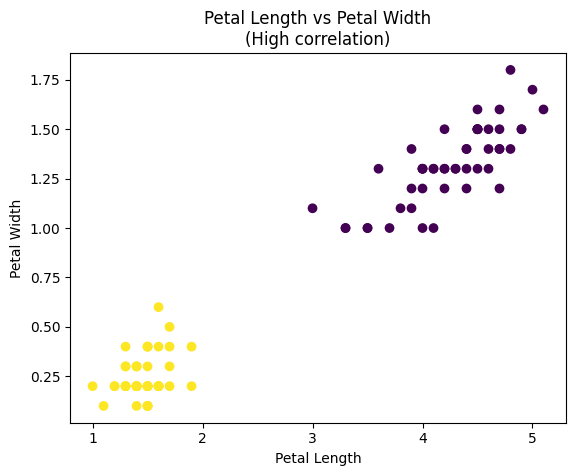

In [11]:
plt.scatter(petal_length_col, petal_width_col, c=final_df['is_setosa_vs_versicolor'], cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width\n(High correlation)')
plt.show()

If data points here were to be projected upon the x or y axis (one of the variables was removed), the remaining variable would still be able to classify those points into our 2 disting classes.
This is bad, reall bad, and implies that one of our features are redundant and should be removed.
I'll pick the petal_length (to be removed).

In [12]:
final_df.drop(columns='petal_length', inplace=True)
final_df.head()

,sepal_length,sepal_width,petal_width,is_setosa_vs_versicolor
0,5.1,3.5,0.2,1
1,4.9,3.0,0.2,1
2,4.7,3.2,0.2,1
3,4.6,3.1,0.2,1
4,5.0,3.6,0.2,1


For reference, here's how a plot of two features with low-correlation looks like:

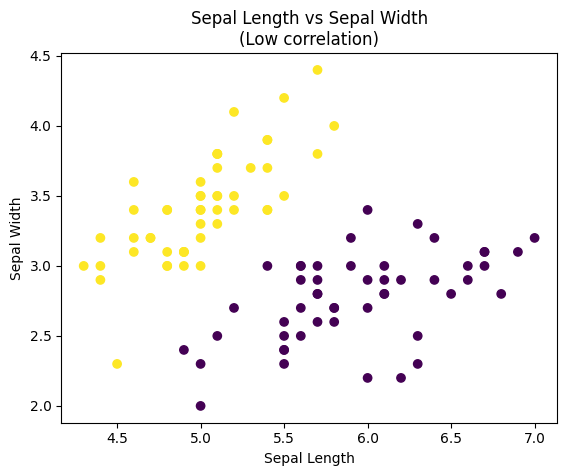

In [13]:
plt.scatter(final_df['sepal_length'], final_df['sepal_width'], c=final_df['is_setosa_vs_versicolor'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width\n(Low correlation)')
plt.show()

In [14]:
x = final_df.drop(columns="is_setosa_vs_versicolor")
y = final_df["is_setosa_vs_versicolor"]
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Model Construction

In [15]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred_from_train = model.predict(x_train)
y_pred_from_train_score = accuracy_score(y_train, y_pred_from_train)
print(f"The Model was constructed this well: {y_pred_from_train_score}")

y_pred_from_test = model.predict(x_test)
y_pred_from_test_score = accuracy_score(y_test, y_pred_from_test)
print(f"The Model was able to correctly predict the output of new entries that well: {y_pred_from_test_score}")


The Model was constructed this well: 1.0
The Model was able to correctly predict the output of new entries that well: 1.0
